# Linear Regresssion - Single and Multiple Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

print("Dataset Shape:", X.shape)
print("Columns:", X.columns)


Dataset Shape: (20640, 8)
Columns: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


## Simple Linear Regression (MedInc --> Target)

In [3]:
X_simple = X[["MedInc"]]  # Using only 'MedInc' for simple regression
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

y_pred_simple = model_simple.predict(X_test)


In [5]:
# Evaluation
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression")
print(f"Intercept: {model_simple.intercept_:.3f}")
print(f"Coefficient: {model_simple.coef_[0]:.3f}")
print(f"MSE: {mse_simple:.3f}")
print(f"R2 Score: {r2_simple:.3f}")


Simple Linear Regression
Intercept: 0.445
Coefficient: 0.419
MSE: 0.709
R2 Score: 0.459


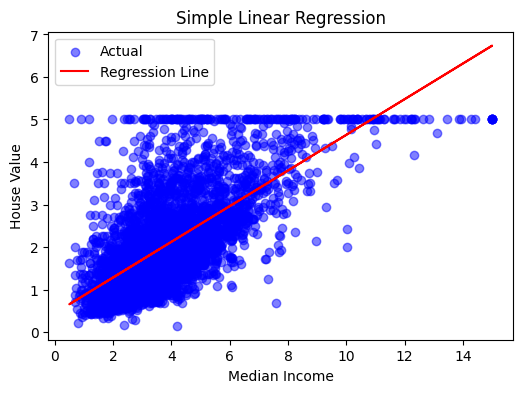

In [6]:
# Visualization
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred_simple, color="red", label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

## Multiple Linear Regression (All Features --> Target)

In [7]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

y_pred_m = model_multiple.predict(X_test_m)

In [8]:
# Evaluation
mse_multiple = mean_squared_error(y_test_m, y_pred_m)
r2_multiple = r2_score(y_test_m, y_pred_m)

print("Multiple Linear Regression")
print(f"Intercept: {model_multiple.intercept_:.3f}")
print(f"Coefficients: {model_multiple.coef_}")
print(f"MSE: {mse_multiple:.3f}")
print(f"R2 Score: {r2_multiple:.3f}")


Multiple Linear Regression
Intercept: -37.023
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
MSE: 0.556
R2 Score: 0.576


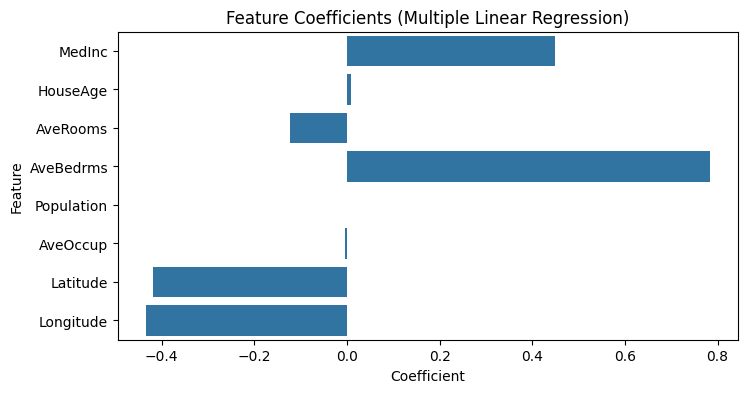

In [9]:
# Feature importance visualization
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model_multiple.coef_})
plt.figure(figsize=(8,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Coefficients (Multiple Linear Regression)")
plt.show()